In [81]:

# 워닝좀 잠깐 무시하자 ㅎ
import warnings
warnings.filterwarnings('ignore')


import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='Malgun Gothic')    # 한글 폰트 적용
plt.rcParams["figure.figsize"] = (20, 10) # 차트 사이즈
mpl.rcParams["axes.unicode_minus"] = False

"""1인가구 지수 데이터"""

# 데이터 형식의 통일
path = "./datas/1인가구.csv"
data = pd.read_csv(path, encoding='cp949') # 인코딩 체크 필
data.head()
n = data.shape[0]                          # len(self.index), len(self.columns)
# n, p = data.shape

data.columns # 행 식별자 
print(f"data.columns 출력 >> {data.columns}")
adm_cd = []

# 문자열 형 변환, 캐스팅
for i in range(n):
    adm_cd.append(str(data['행정동코드'][i]))
    
# print(f"adm_cd 출력 >> {adm_cd}")
data['adm_cd'] = adm_cd     # 행정동 코드 값만 열에 추가하기 (table에 들어갈 수 있게 길이거 같아야 함)

data


data.columns 출력 >> Index(['행정동코드', '자치구', '행정동명', '성별', '연령대', '총인구', '1인가구수', '커뮤니케이션이 적은 집단',
       '평일 외출이 적은 집단', '휴일 외출이 적은 집단', '출근소요시간 및 근무시간이 많은 집단',
       '외출이 매우 적은 집단 (전체)', '외출이 매우 많은 집단', '동영상서비스 이용이 많은 집단',
       '생활서비스 이용이 많은 집단', '재정상태에 대한 관심집단', '외출-커뮤니케이션이 모두 적은 집단 (전체)'],
      dtype='object')


,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단 (전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단 (전체),adm_cd
0,1101053,종로구,사직동,1,20,220,68,14,7,4,6,4,5,10,3,4,2,1101053
1,1101053,종로구,사직동,1,25,321,107,16,12,5,14,5,12,11,22,16,5,1101053
2,1101053,종로구,사직동,1,30,351,107,19,16,12,12,12,19,17,12,15,8,1101053
3,1101053,종로구,사직동,1,35,353,105,22,13,7,11,11,17,16,9,7,9,1101053
4,1101053,종로구,사직동,1,40,419,79,18,7,11,6,12,11,12,6,6,12,1101053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,1125074,강동구,길동,2,55,2262,307,32,47,26,62,52,13,52,33,28,74,1125074
10172,1125074,강동구,길동,2,60,1532,206,19,38,13,42,48,6,34,19,8,61,1125074
10173,1125074,강동구,길동,2,65,1039,182,14,20,14,28,24,2,19,27,25,25,1125074
10174,1125074,강동구,길동,2,70,804,137,14,31,2,29,29,1,26,21,11,37,1125074


In [82]:

"""행정동 위치 파일과 결합"""
geo = gpd.read_file('./datas/data.shp')
df_geo = geo.iloc[:,[2,9]] # 2번 9번 열 선택해 추출 해 옴 
rdata = pd.merge(data, df_geo, on='adm_cd') # 위 경도값 필요, merge(left table, right table, merge할 key를 on)
# print(rdata.head())
print(type(rdata))

# geometry, 위경도 값만 붙이면 pandas에서 해줌, 폴리건을 가지고 있으면 그릴 수 있는 기능을 만들기 위해
# crs 는 좌표계임, 위 경도 값 좌표라는 것을 알려줘야 함
data_merge = gpd.GeoDataFrame(rdata, crs="EPSG:4326", geometry="geometry")
print(type(data_merge))
data_merge


<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단 (전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단 (전체),adm_cd,geometry
0,1101053,종로구,사직동,1,20,220,68,14,7,4,6,4,5,10,3,4,2,1101053,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,1101053,종로구,사직동,1,25,321,107,16,12,5,14,5,12,11,22,16,5,1101053,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
2,1101053,종로구,사직동,1,30,351,107,19,16,12,12,12,19,17,12,15,8,1101053,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
3,1101053,종로구,사직동,1,35,353,105,22,13,7,11,11,17,16,9,7,9,1101053,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
4,1101053,종로구,사직동,1,40,419,79,18,7,11,6,12,11,12,6,6,12,1101053,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10147,1125074,강동구,길동,2,55,2262,307,32,47,26,62,52,13,52,33,28,74,1125074,"MULTIPOLYGON (((127.14857 37.54578, 127.14871 ..."
10148,1125074,강동구,길동,2,60,1532,206,19,38,13,42,48,6,34,19,8,61,1125074,"MULTIPOLYGON (((127.14857 37.54578, 127.14871 ..."
10149,1125074,강동구,길동,2,65,1039,182,14,20,14,28,24,2,19,27,25,25,1125074,"MULTIPOLYGON (((127.14857 37.54578, 127.14871 ..."
10150,1125074,강동구,길동,2,70,804,137,14,31,2,29,29,1,26,21,11,37,1125074,"MULTIPOLYGON (((127.14857 37.54578, 127.14871 ..."


      행정동코드  자치구 행정동명  성별  연령대  총인구  1인가구수  커뮤니케이션이 적은 집단  평일 외출이 적은 집단  \
0   1101053  종로구  사직동   1   20  220     68             14             7   
24  1101054  종로구  삼청동   1   20   96     47              8            24   
48  1101055  종로구  부암동   1   20  599     96             11            11   
72  1101056  종로구  평창동   1   20  663     69              8             3   
96  1101057  종로구  무악동   1   20  226     26              4             3   

    휴일 외출이 적은 집단  출근소요시간 및 근무시간이 많은 집단  외출이 매우 적은 집단 (전체)  외출이 매우 많은 집단  \
0              4                     6                  4             5   
24            13                    20                 16             1   
48            15                    10                 21            12   
72             6                     6                 10            16   
96             3                     1                  0             4   

    동영상서비스 이용이 많은 집단  생활서비스 이용이 많은 집단  재정상태에 대한 관심집단  \
0                 10                3     

<Figure size 2000x1000 with 0 Axes>

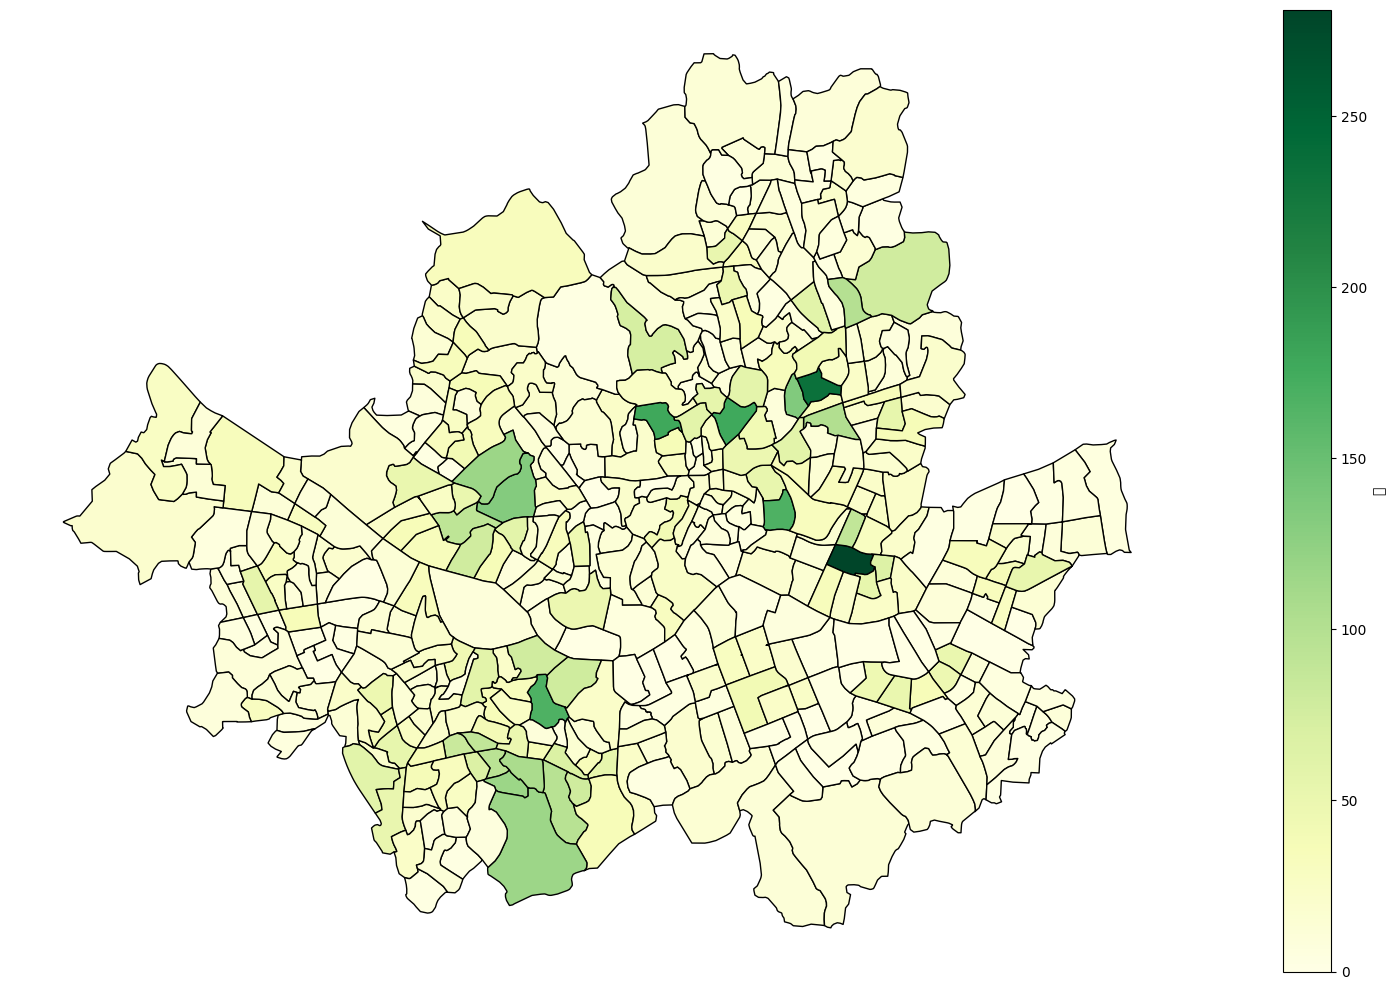

In [83]:

"""시각화: 20~24세, 남성 평일 외출이 적은 집단"""

# 추출
data_tmp = data_merge[data_merge['연령대'] == 20][data_merge['성별'] == 1] # 연령대가 20이면서 (and) 성별이 1 인 것 들만
data_tmp_woman = data_merge[data_merge['연령대'] == 20][data_merge['성별'] == 2] # 연령대가 20이면서 (and) 성별이 1 인 것 들만

idx = (data_merge['연령대'] == 20) & (data_merge['성별'] == 1) # 위와 같은 결과, 다른 방법, `loc` 활용해서 사용하는 방법
data_tmp.loc[idx,:]
print(data_tmp.head())
print(type(data_tmp))

# 시각화,  column 에 시각화할 필드명을 입력
fig = plt.figure()
data_tmp.plot(
    column='평일 외출이 적은 집단',
    legend=True,
    cmap='YlGn',
    edgecolor='k',
    legend_kwds={'label': '명'}
)
plt.axis('off')
plt.tight_layout()
plt.savefig('./example_1.png')
plt.show()



In [84]:

# 연령대의 병합, 구분
# 20-29: 20대 (초기청년층)
# 30-39: 30대 (후기청년층)
# 40-49: 40대 (중년층)
# 50-64: 50대 (장년층)
# 65: 65세 이상 (노년층)
data_merge['연령대1'] = data_merge['연령대']

idx = (data_merge["연령대"] == 25)
data_merge["연령대1"][idx] = 20

idx = (data_merge["연령대"] == 35)
data_merge["연령대1"][idx] = 30

idx = (data_merge["연령대"] == 45)
data_merge["연령대1"][idx] = 40

idx = (data_merge["연령대"] == 55)
data_merge["연령대1"][idx] = 50

idx = (data_merge["연령대"] == 60)
data_merge["연령대1"][idx] = 50

idx = (data_merge["연령대"] > 60)
data_merge["연령대1"][idx] = 65

colname_ = list ( data_merge.columns[5:17] )
print(f"colname_ 출력 >> {colname_}")
data_groupby = data_merge.groupby(["adm_cd",'연령대1'])[colname_].sum()
# 인덱스 덩어리에서 실제 접근 가능한 값으로 바꿔줘야함, list 형태의 컬럼을 전달 해 줘서!

data_groupby



colname_ 출력 >> ['총인구', '1인가구수', '커뮤니케이션이 적은 집단', '평일 외출이 적은 집단', '휴일 외출이 적은 집단', '출근소요시간 및 근무시간이 많은 집단', '외출이 매우 적은 집단 (전체)', '외출이 매우 많은 집단', '동영상서비스 이용이 많은 집단', '생활서비스 이용이 많은 집단', '재정상태에 대한 관심집단', '외출-커뮤니케이션이 모두 적은 집단 (전체)']


총인구  1인가구수  커뮤니케이션이 적은 집단  평일 외출이 적은 집단  휴일 외출이 적은 집단  \
adm_cd  연령대1                                                            
1101053 20     1269    403             51            41            18   
        30     1537    449             64            56            40   
        40     1602    330             50            42            26   
        50     1972    322             33            38            24   
        65     1468    350             20            18            19   
...             ...    ...            ...           ...           ...   
1125074 20     6842   1525            160           183           166   
        30     8541   1804            187           194           193   
        40     7204   1129            123           140           104   
        50    10883   1395            148           183           118   
        65     5124   1155             77           106            70   

              출근소요시간 및 근무시간이 많은 집단  외출이 매우 적은 집단 (전체)  외출이 매우 많은 집단  \
adm_cd  연령대1                                                          
1101053 20                      42                 16            37   
        30                      43                 41            69   
        40                      34                 33            32   
        50                      36                 55            14   
        65                      17                 32             4   
...                            ...                ...           ...   
1125074 20                     194                169           216   
        30                     209                215           397   
        40                     152                180           120   
        50                     206                316            74   
        65                     112                135            11   

              동영상서비스 이용이 많은 집단  생활서비스 이용이 많은 집단  재정상태에 대한 관심집단  \
adm_cd  연령대1                                                     
1101053 20                  34               40             30   
        30                  55               38             33   
        40                  44               33             27   
        50                  36               30             27   
        65                  16               18             24   
...                        ...              ...            ...   
1125074 20                 190              147            174   
        30                 174              182            223   
        40                 134              123            128   
        50                 182              165            147   
        65                  96               86            103   

              외출-커뮤니케이션이 모두 적은 집단 (전체)  
adm_cd  연령대1                            
1101053 20                          17  
        30                          39  
        40                          28  
        50                          37  
        65                          26  
...                                ...  
1125074 20                         192  
        30                         198  
        40                         199  
        50                         362  
        65                         158  

[2115 rows x 12 columns]

<Figure size 2000x1000 with 0 Axes>

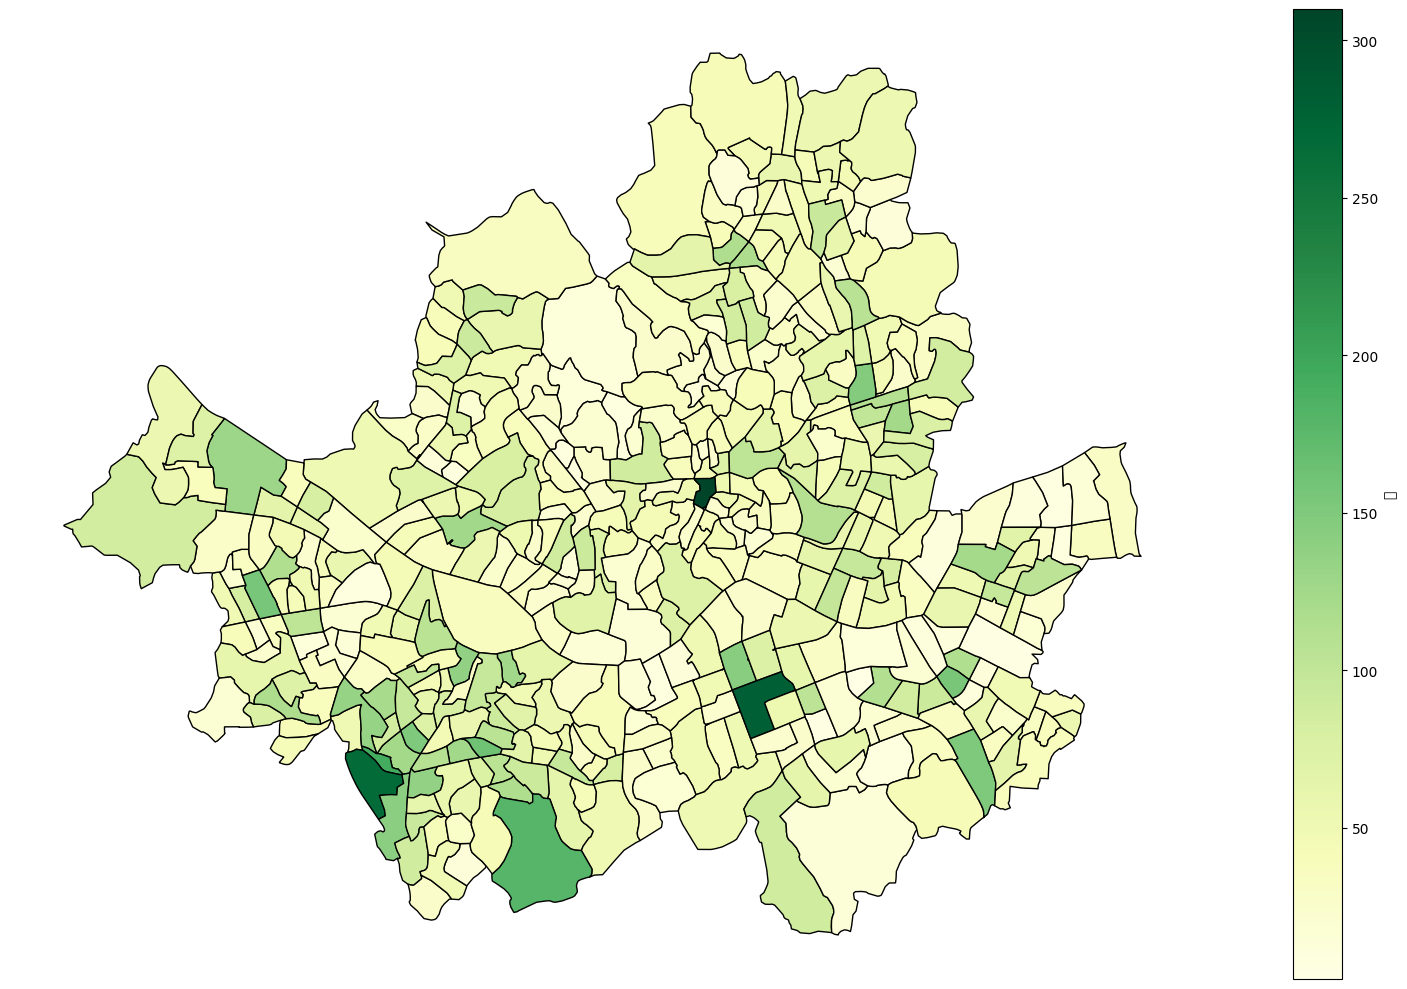

In [85]:
# 위에 완전 이어서

data_groupby = data_groupby.reset_index()
data_groupby = pd.merge(data_groupby, df_geo, on = 'adm_cd')
data_groupby = gpd.GeoDataFrame(data_groupby, crs="EPSG:4326", geometry="geometry")

# 중년층 중 휴일 외출이 적은 집단
data_tmp = data_groupby[data_groupby['연령대1']==40]
fig = plt.figure()
data_tmp.plot(
    column='휴일 외출이 적은 집단',
    legend=True,
    cmap='YlGn',
    edgecolor='k',
    legend_kwds={'label': '명'}
)
plt.axis('off')
plt.tight_layout()
plt.savefig('example_2.png')
plt.show()